# 0.) Import and Clean data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [23]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("/Users/sandinatatu/Desktop/Country-data.csv", sep = ",")

In [24]:
names = df["country"].copy()
X=df.drop("country", axis=1)

In [25]:
scaler = StandardScaler().fit(X)

In [26]:
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [27]:
kmeans = KMeans(n_clusters = 8).fit(X_scaled)

# 2.) Pick two features to visualize across

I choose the child_mort and income columns and visualize accross them.

In [71]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

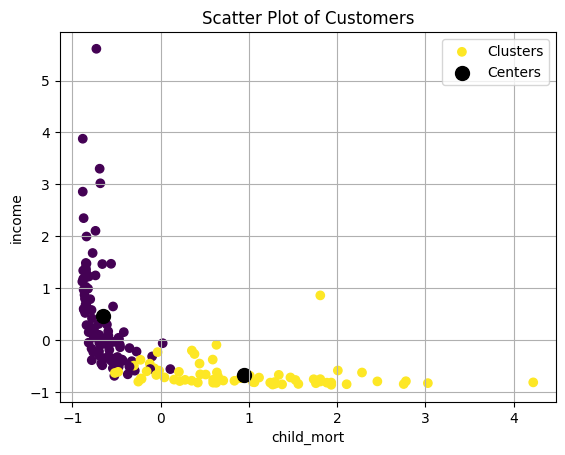

In [72]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 4


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [73]:
WCSs=[]
ks=range(1,15)

for k in ks:
    kmeans = KMeans(n_clusters = k, n_init=30, init="random").fit(X_scaled)
    WCSs.append(kmeans.inertia_)

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

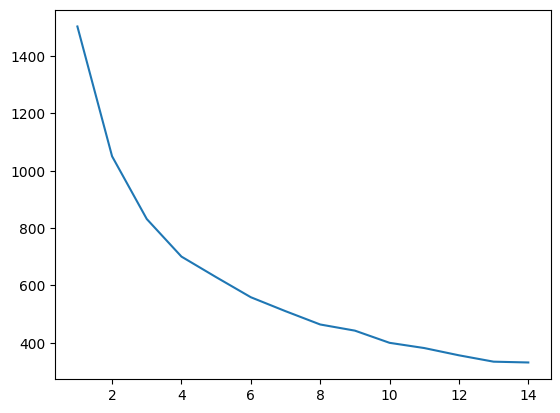

In [74]:
plt.plot(ks, WCSs)
plt.show()

Since I am using the elbow method, I will be choosing the number of clusters at the elbow point. Since after 4 clusters the inertia starts decreasing linearly, I choose 4 as the number of clusters.

In [2]:
elbowmodel = KMeans(n_clusters =4, n_init=30, init="random").fit(X_scaled)

# 6.) Do the same for a silhoutte plot

In [45]:
from sklearn.metrics import silhouette_score

In [46]:
SCs=[]
ks=range(2,15)

for k in ks:
    kmeans = KMeans(n_clusters = k, n_init=30, init="random").fit(X_scaled)
    SCs.append(silhouette_score(X_scaled,kmeans.labels_))


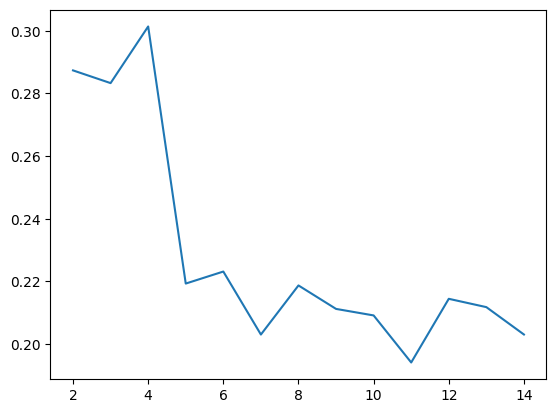

In [47]:
plt.plot(ks, SCs)
plt.show()

The number of clusters providing the highest silhouette score is also 4, so I will be again fitting a model with 4 clusters.

In [75]:
silhouettemodel = KMeans(n_clusters =4, n_init=30, init="random").fit(X_scaled)

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [52]:
kmeans = KMeans(n_clusters =2,n_init=30, init="random").fit(X_scaled)

In [53]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [55]:
output = pd.concat([preds,df], axis=1)

In [57]:
print("Cluster 1: ")
list(output.loc[output[0]==0, "country"])

Cluster 1: 


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

In [58]:
print("Cluster 1: ")
list(output.loc[output[0]==1, "country"])

Cluster 1: 


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

I notice that the vast majority of European countries are in the first cluster. The first cluster also contains most North American and North African countries, as well as most countries from the Arabian Peninsula.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [66]:
output = output.drop("country", axis=1)
output.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


# 9.) Write an observation about the descriptive statistics.

Child mortality is significantly lower in the first cluster. Countries in the first cluster import, on average, just as much as they export. On the other hand, countries in the second cluster import more than they export. Countries in the first cluster have, on average, significantly higher income levels, life_expectancy levels, and gdps than countried from the second cluster. They also have, on average, significantly lower inflation than countries in the second cluster. 